In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Load in files
with open("optimization_inhib_full7.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_inhib_full7.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_inhib_full7.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [5]:
#Returned optimization output
optimization

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence
0,38.0,0.745455,0.070481,0.969615,-46.978246,2.0
1,32.0,0.939409,0.319725,0.176313,-47.649193,8.0
2,92.0,0.877148,0.921493,0.392157,-48.288979,12.0
3,100.0,0.384532,0.823807,0.482784,-48.373565,13.0
4,100.0,0.850437,0.884755,0.906624,-48.414327,19.0
5,94.0,1.000000,1.000000,0.860619,-48.445092,20.0
6,89.0,0.691572,1.000000,0.339879,-48.459391,24.0
7,95.0,0.592947,0.931909,0.473176,-48.489024,25.0


In [6]:
#Create DF for objective data
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence
0,31.0,0.058576,0.980442,0.253543,-46.925474,39
1,77.0,0.863157,0.274245,0.480409,-47.866970,45
2,70.0,0.221076,0.589968,0.898770,-48.284045,45
3,93.0,0.928285,0.333842,0.782069,-48.028677,49
4,81.0,0.800321,0.780049,0.769805,-48.298298,33
...,...,...,...,...,...,...
295,88.0,0.858698,0.900257,0.878713,-48.357888,48
296,93.0,0.776307,0.921631,0.372550,-48.338228,45
297,63.0,0.899241,0.877843,0.208788,-48.269404,19
298,37.0,0.677487,0.233846,0.901270,-47.877580,48


In [7]:
successes = objectiveDF[objectiveDF['Fitness'] < -69.98987]

In [8]:
successes['mut_rate'].mean()

nan

In [9]:
successes['cov_rate'].mean()

nan

In [10]:
successes['Convergence'].mean()

nan

In [11]:
faster_successes = successes[successes['Convergence'] < 12]

In [12]:
faster_successes

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence


In [13]:
faster_successes['mut_rate'].mean()

nan

In [14]:
faster_successes['cov_rate'].mean()

nan

In [15]:
successes.groupby('Convergence').mean()

,population,pop_ratio,mut_rate,cov_rate,Fitness
Convergence,,,,,


In [16]:
#Only one sample with a mean of 34
successes[successes['Convergence'] == 31.0]

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence


[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for All Simulations')]

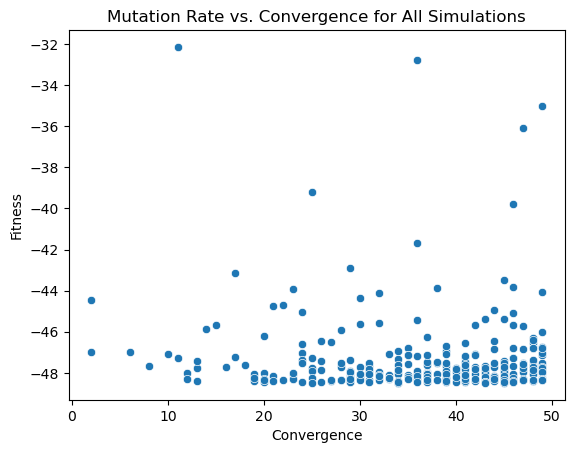

In [17]:
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Mutation Rate vs. Convergence for All Simulations')

[Text(0.5, 1.0, 'Crossver Rate vs. Mutation Rate for All Simulations (Varied Population Ratio)')]

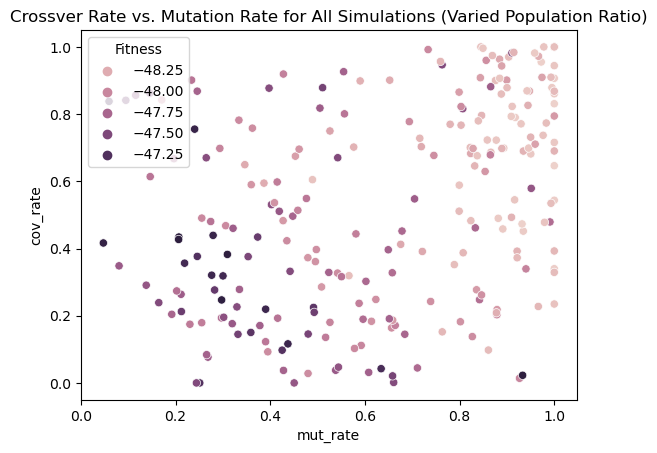

In [33]:
better = objectiveDF[objectiveDF['Fitness'] < -47]
# better['Fitness'] = better['Fitness']*-1
sns.scatterplot(x='mut_rate', y='cov_rate', data= better, 
                hue = 'Fitness').set(title='Crossver Rate vs. Mutation Rate for All Simu (Varied Population Ratio)')

## Successful Runs

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Successful Simulations')]

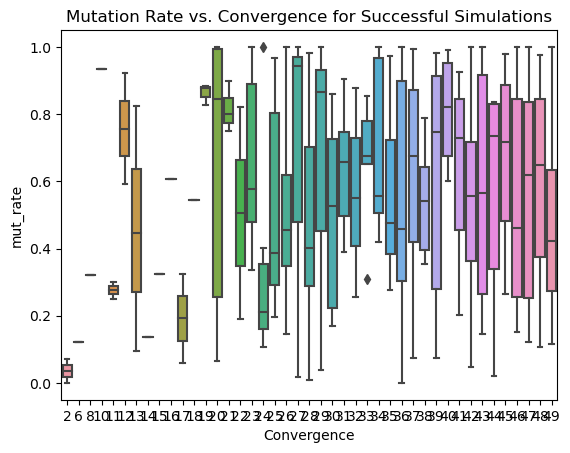

In [24]:
sns.boxplot(x='Convergence', y='mut_rate', data= objectiveDF).set(title='Mutation Rate vs. Convergence for Successful Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Successful Simulations')]

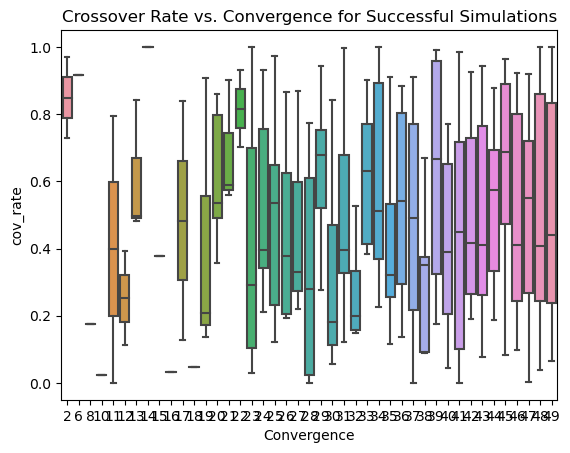

In [25]:
sns.boxplot(x='Convergence', y='cov_rate', data= objectiveDF).set(title='Crossover Rate vs. Convergence for Successful Simulations')

In [20]:
groups_size = pd.DataFrame(successes.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

In [21]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Successful Simulations by Convergence')

ValueError: min() arg is an empty sequence

## Unsuccessful Runs

In [22]:
failures = objectiveDF[objectiveDF['Fitness'] > -69.98987]

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Failed Simulations')]

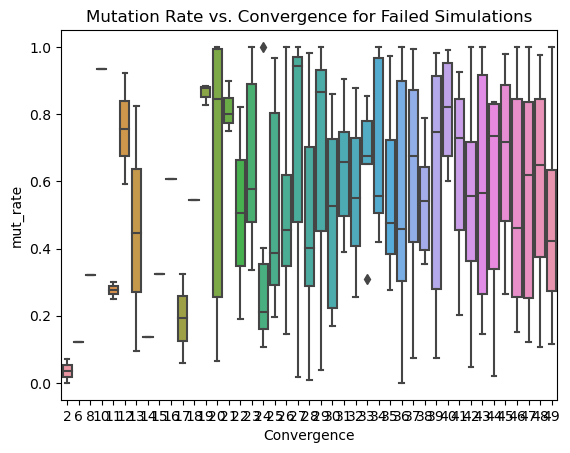

In [23]:
sns.boxplot(x='Convergence', y='mut_rate', data= failures).set(title='Mutation Rate vs. Convergence for Failed Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Failed Simulations')]

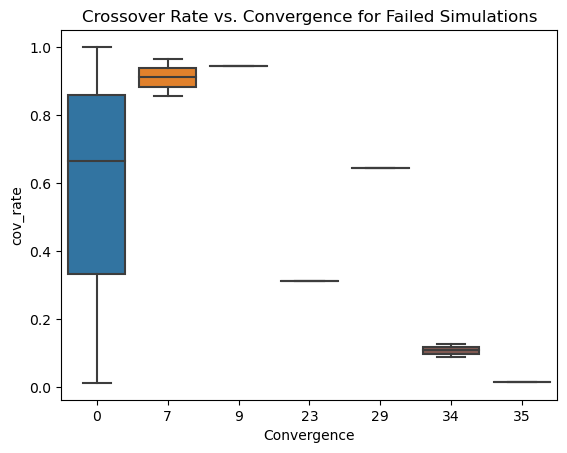

In [189]:
sns.boxplot(x='Convergence', y='cov_rate', data= failures).set(title='Crossover Rate vs. Convergence for Failed Simulations')

In [190]:
groups_size = pd.DataFrame(failures.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Failed Simulations by Convergence')]

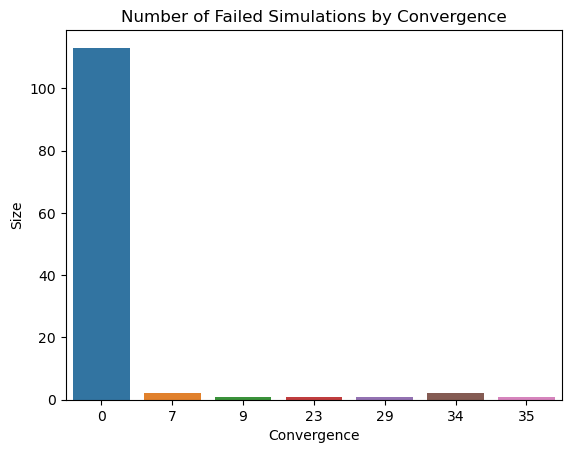

In [191]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Failed Simulations by Convergence')

## Causes of Failures

In [192]:
failures[failures['Convergence'] > 0]

,mut_rate,cov_rate,Fitness,Convergence
21,0.121183,0.642901,-69.980713,29
23,0.382828,0.088326,-69.980713,34
106,0.258299,0.854880,-69.908376,7
128,0.497879,0.310067,-69.980713,23
137,0.244264,0.014491,-69.976836,35
187,0.860343,0.942898,-69.908376,9
292,0.359146,0.125455,-69.980713,34
297,0.878641,0.965290,-69.908376,7


In [193]:
higher_cov = objectiveDF[(objectiveDF['cov_rate'] > objectiveDF['mut_rate'])]

In [194]:
higher_cov.groupby('Convergence').size()

Convergence
0     83
7      2
9      1
11     2
13     1
14     6
15     6
16     1
17     4
18     3
19     6
20     2
21     1
22     2
24     2
29     1
31     1
dtype: int64

In [195]:
len(higher_cov[higher_cov['Fitness'] > -69.98987])

87

In [199]:
len(higher_cov[higher_cov['Fitness'] < -69.98987])

37

In [202]:
len(objectiveDF[objectiveDF['Fitness'] > -69.98987])

121